In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
df = pd.read_csv('CC GENERAL.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8950, 18)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

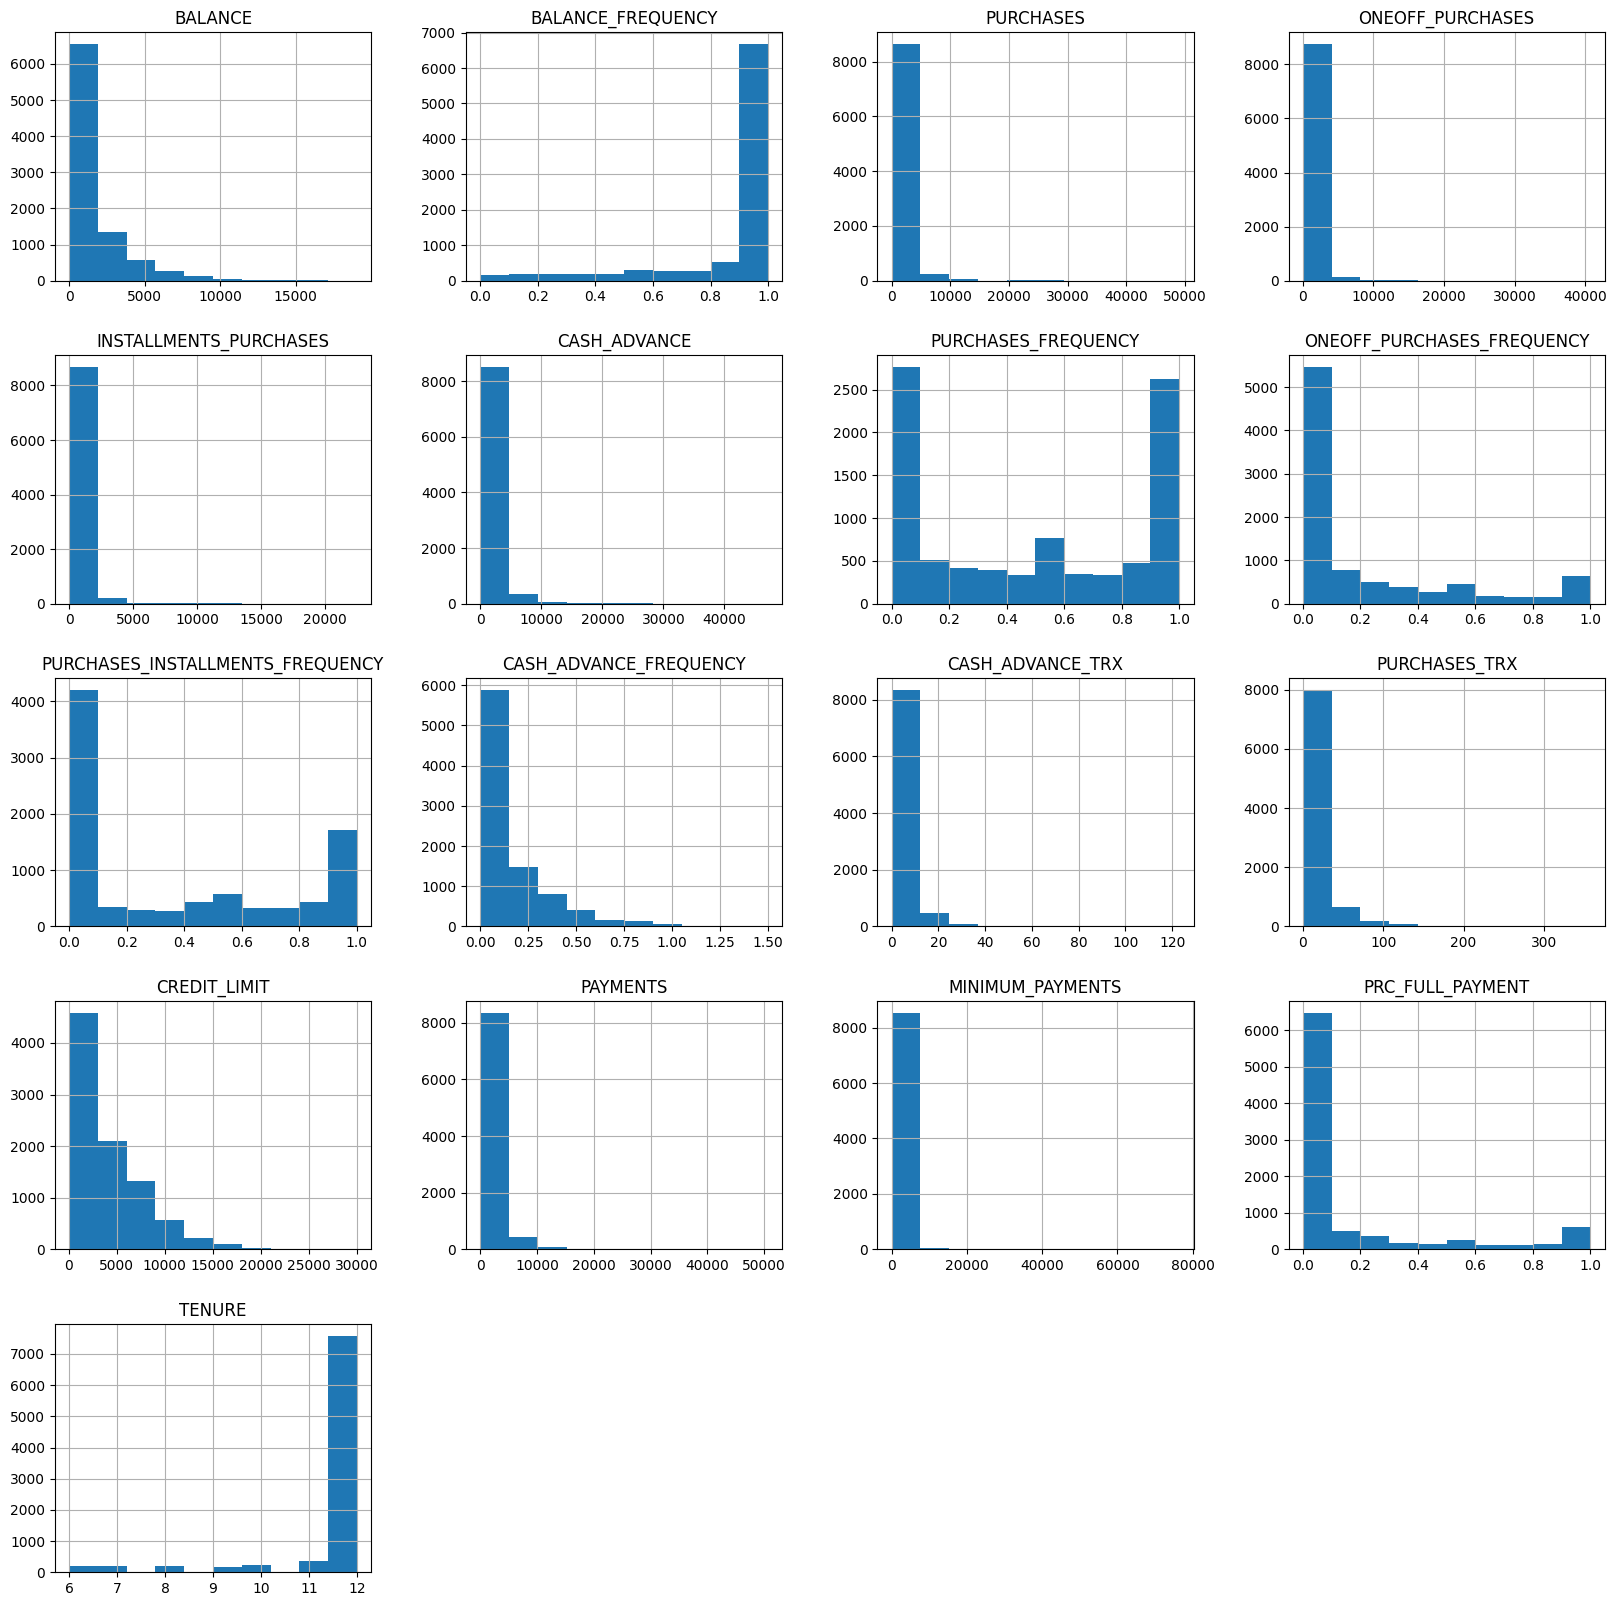

In [7]:
df.hist(figsize=(20,20))
plt.show()

In [8]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [9]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [10]:
df.isna().sum() 

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHASES_T

In [12]:
df.drop('CUST_ID', axis=1, inplace=True)
train = df

In [13]:
log_transformer = FunctionTransformer(func=np.log1p, validate=True)

train = log_transformer.transform(train)
train = pd.DataFrame(train, columns=df.columns)
train.head()

c:\Users\abdal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,5.747647,0.000000,2.564949
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949


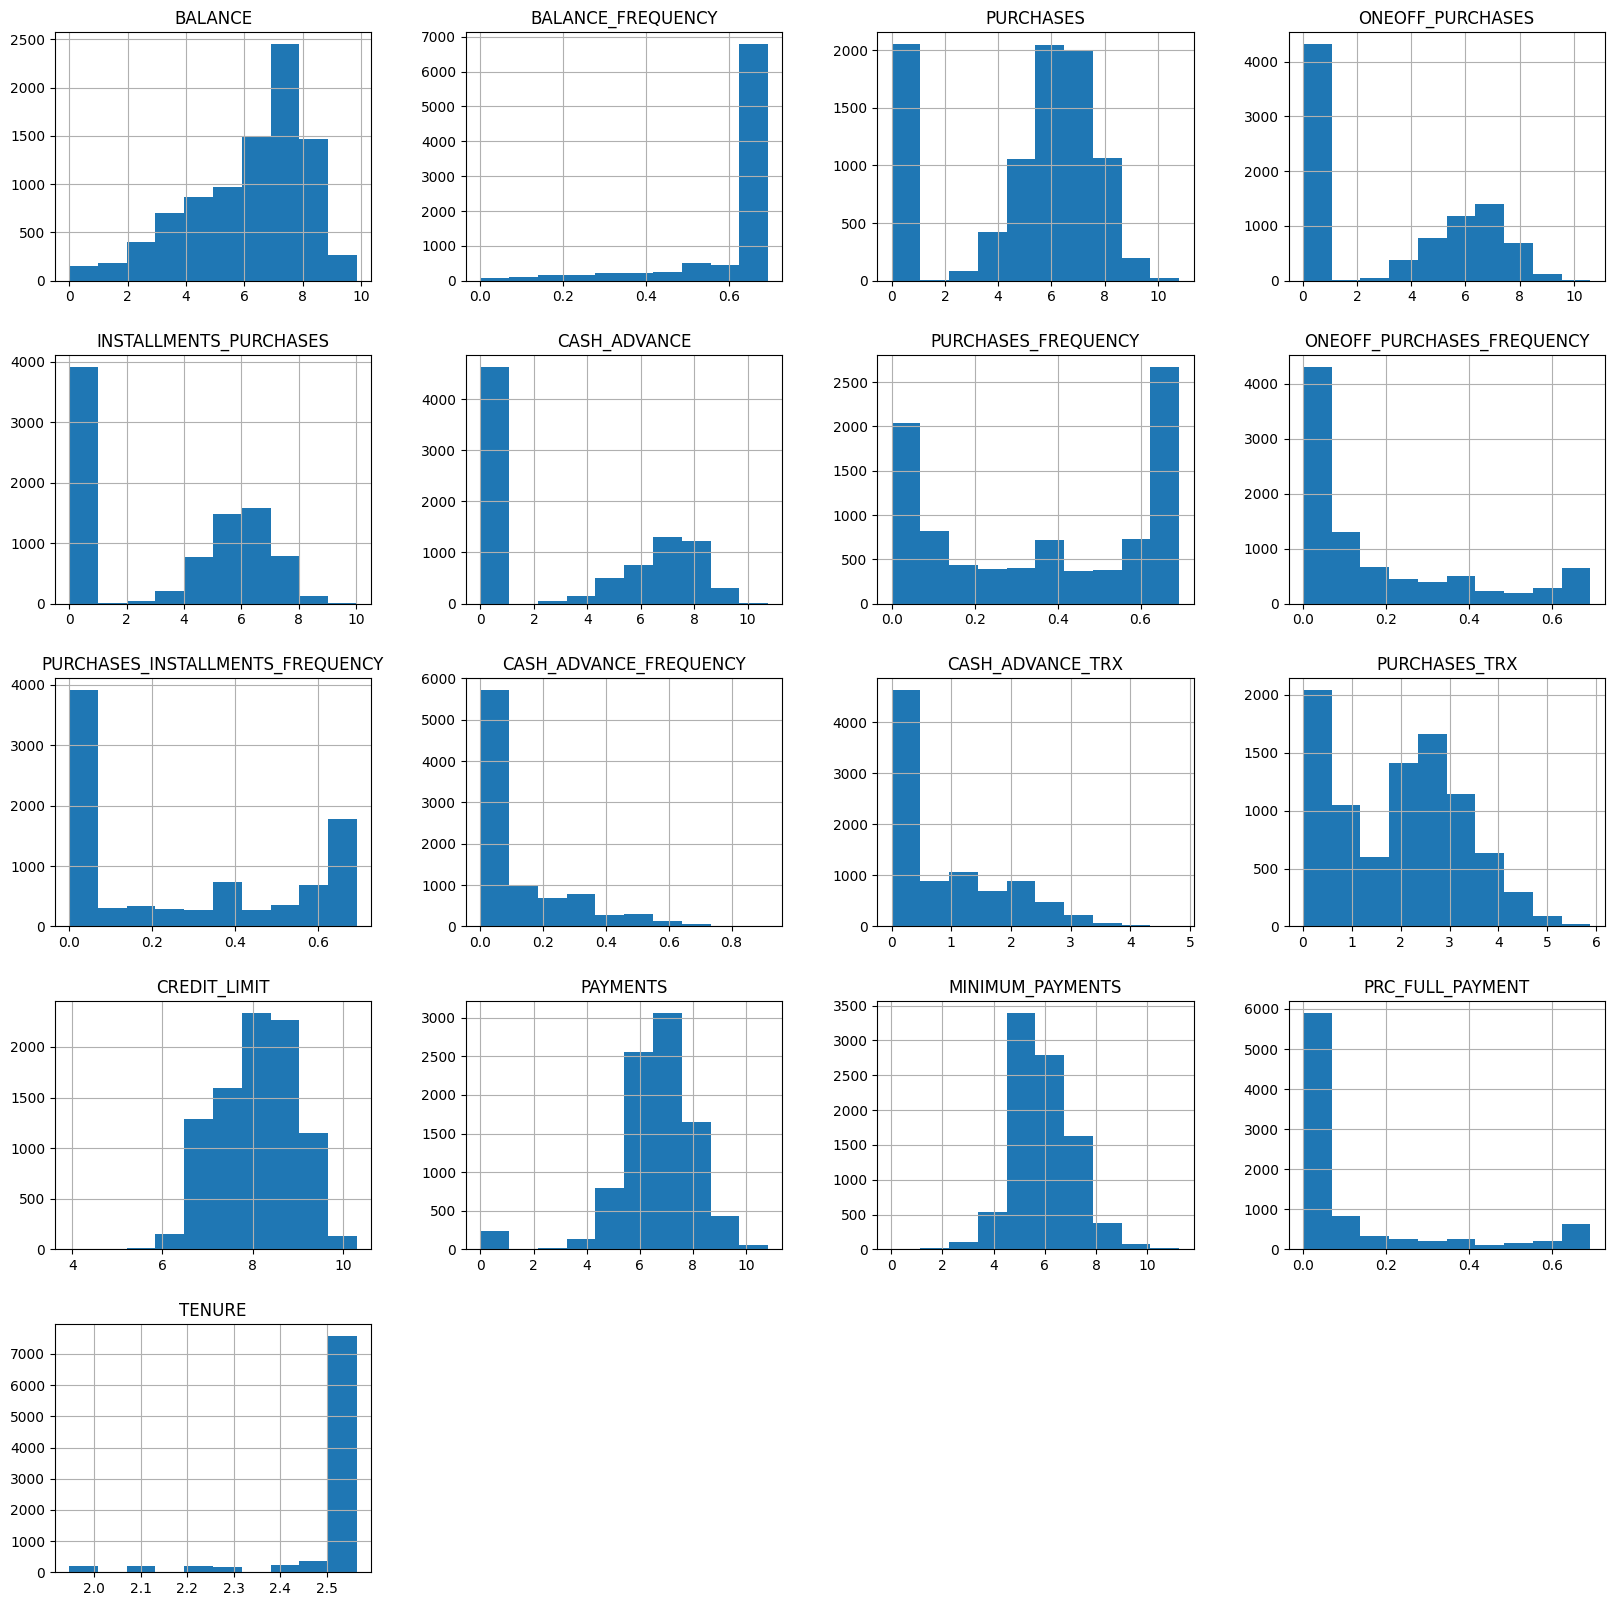

In [14]:
train.hist(figsize=(20,20))
plt.show()

In [15]:
scaler = RobustScaler()
train = scaler.fit_transform(train)
train = pd.DataFrame(train, columns=df.columns)
train.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.098709,-1.667474,-0.400816,-0.575940,0.011167,0.00000,-0.440481,-0.305081,-0.132428,0.000000,0.000000,-0.446395,-0.783504,-0.901851,-0.526176,0.000000,0.0
1,0.469390,-0.813879,-1.783332,-0.575940,-0.731440,1.25004,-0.710662,-0.305081,-0.275459,1.111990,1.000000,-0.946395,0.604504,0.978504,0.807185,1.502798,0.0
2,0.379179,0.000000,0.229626,0.469773,-0.731440,0.00000,0.504223,2.336846,-0.275459,0.000000,0.000000,0.220964,0.653731,-0.200086,0.455992,0.000000,0.0
3,0.233342,-3.510781,0.429786,0.573755,-0.731440,0.75988,-0.570371,0.000000,-0.275459,0.398875,0.430677,-0.630930,0.653731,-4.223180,0.000000,0.000000,0.0
4,-0.023909,0.000000,-0.925948,-0.130537,-0.731440,0.00000,-0.570371,0.000000,-0.275459,0.000000,0.000000,-0.630930,-0.653517,-0.146029,-0.159462,0.000000,0.0


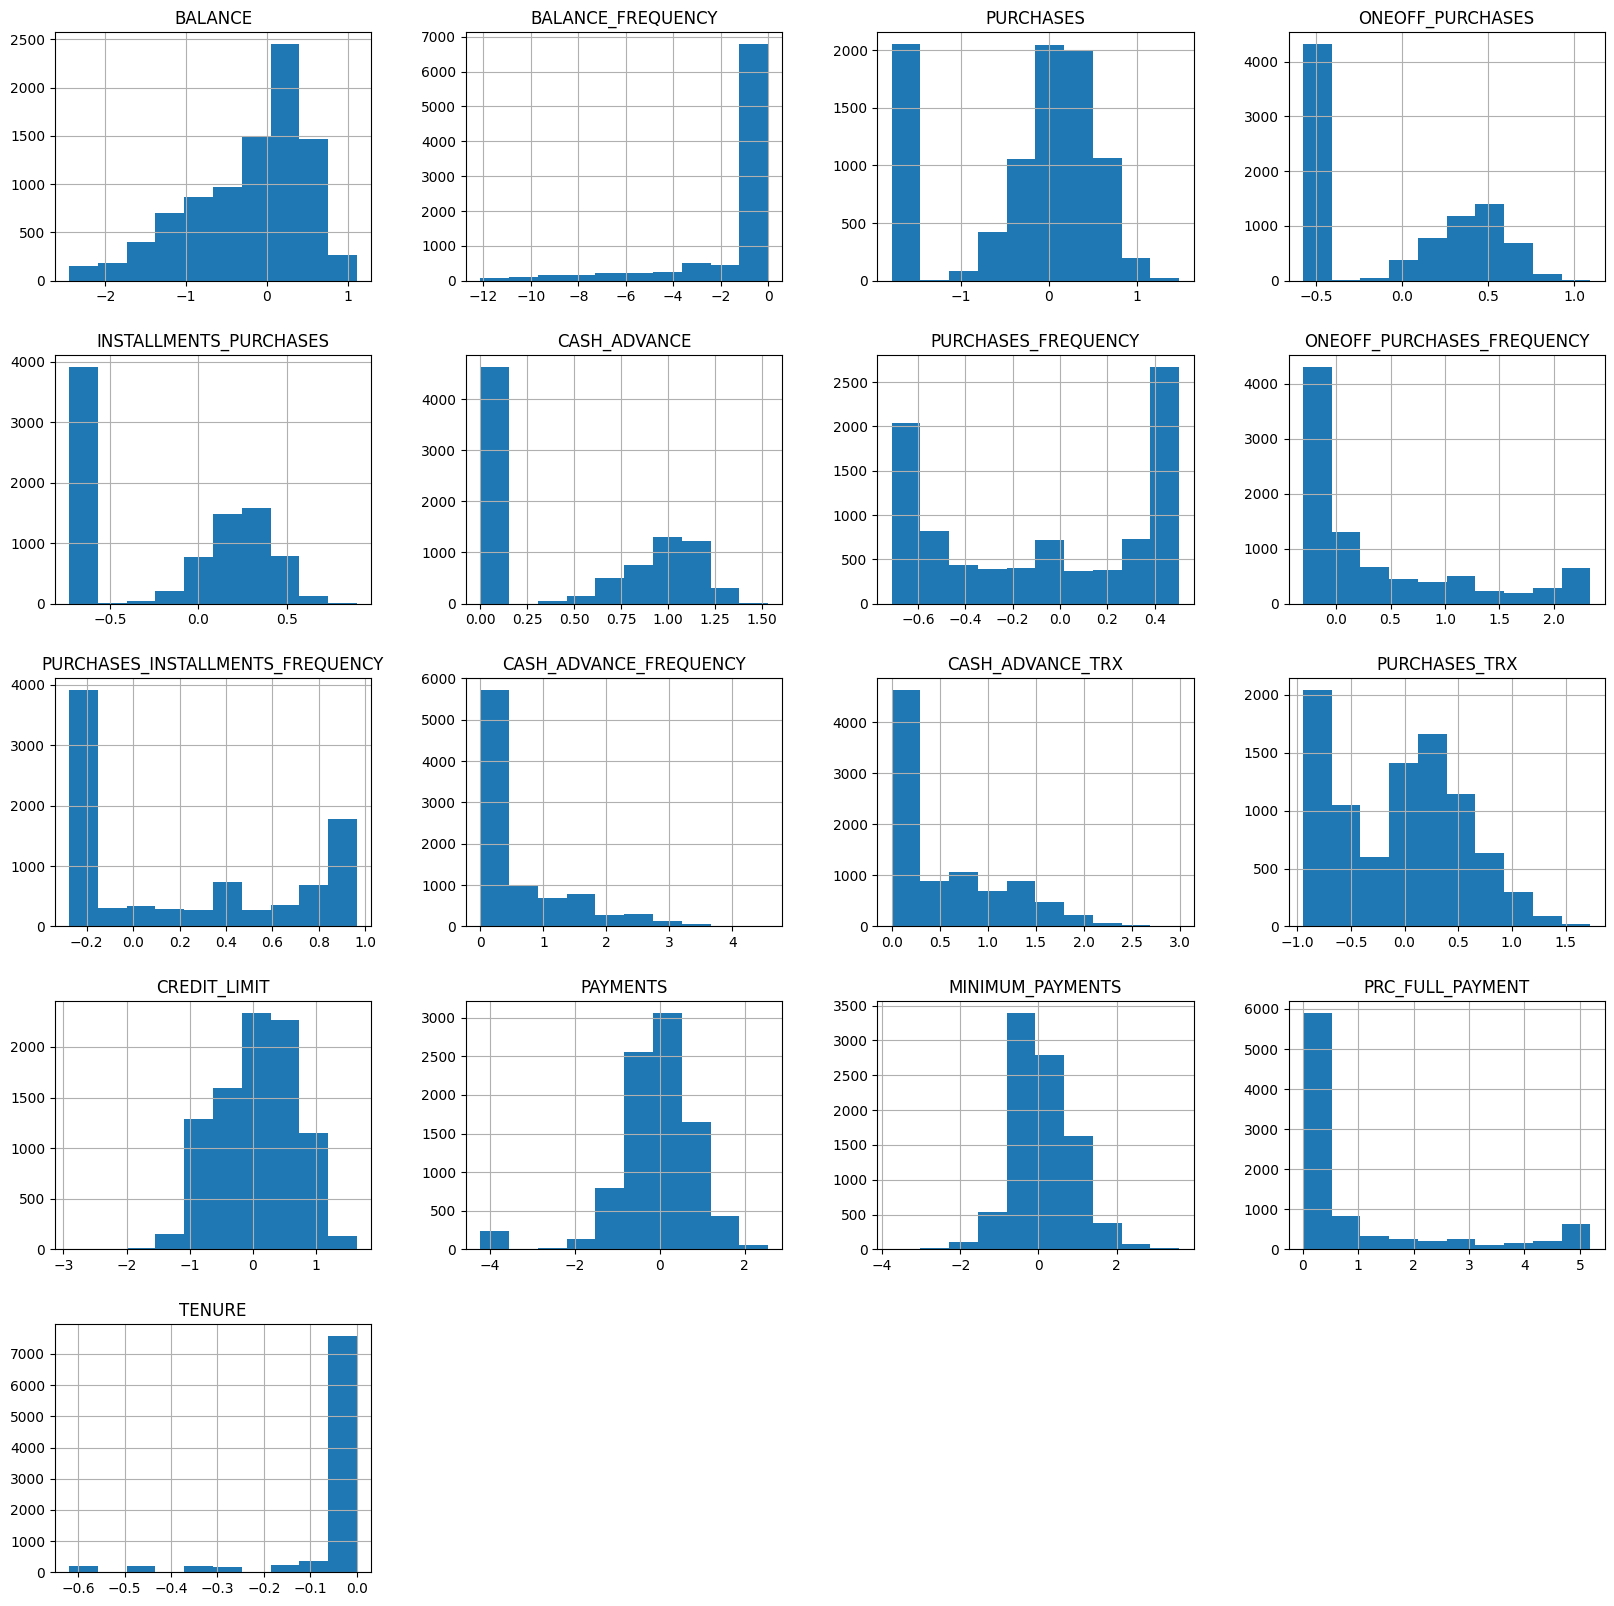

In [16]:
train.hist(figsize=(20,20)) 
plt.show()

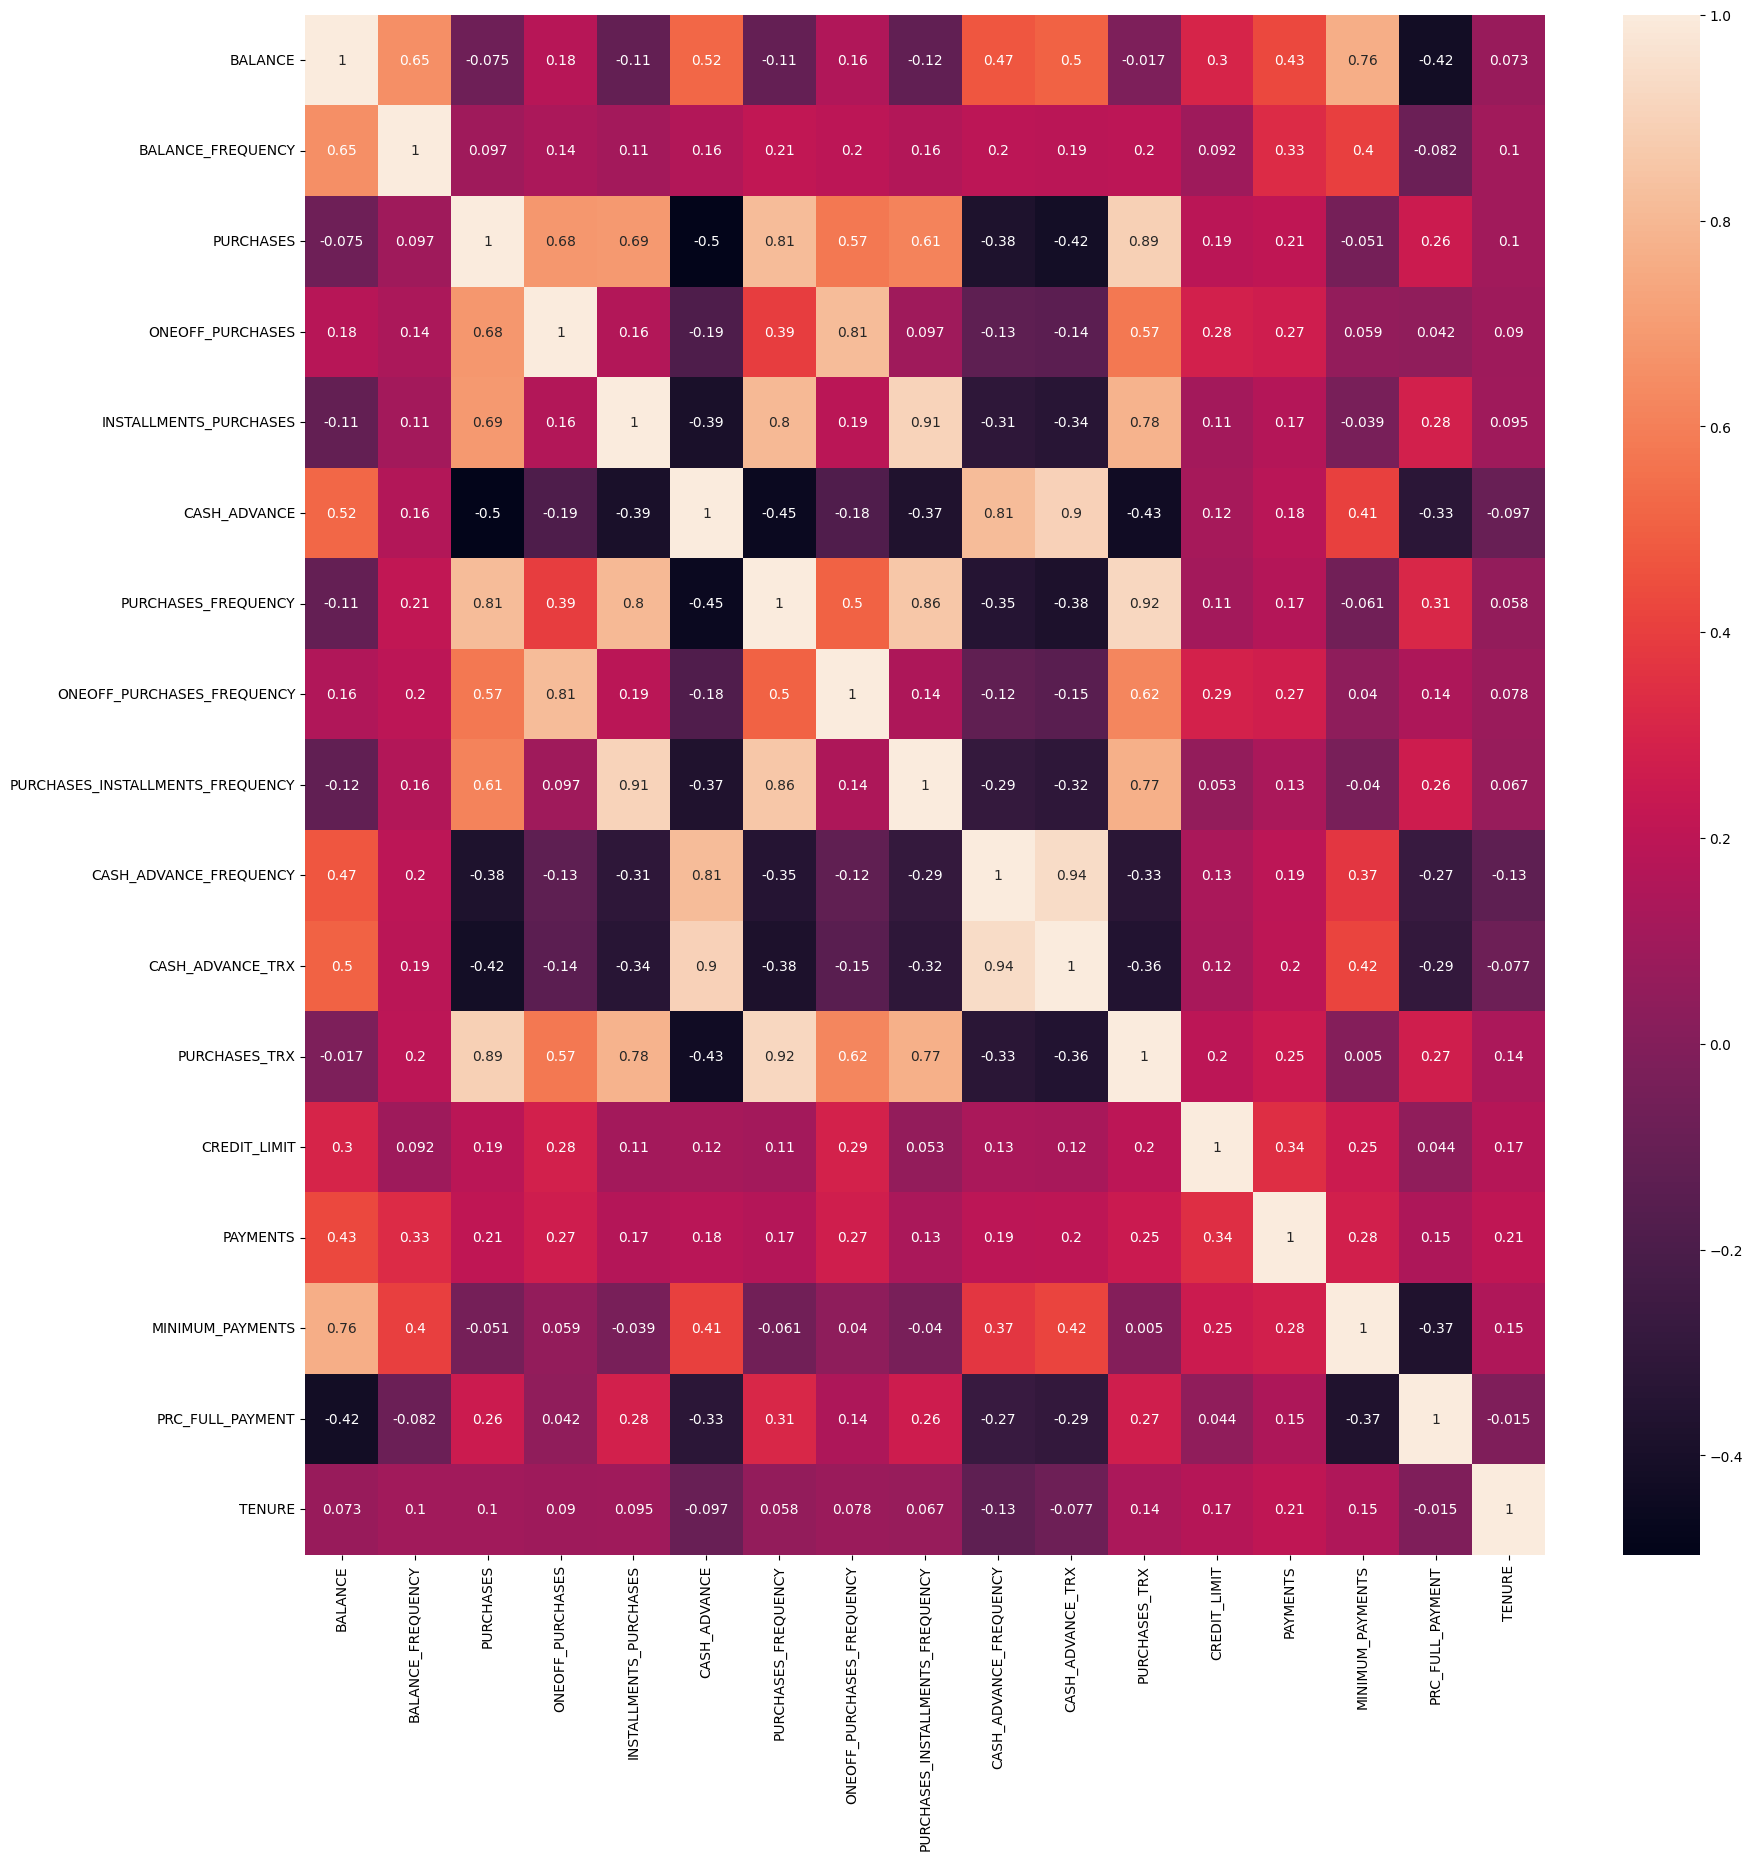

In [17]:
plt.figure(figsize=(20, 20))
sns.heatmap(train.corr(), annot=True)
plt.show()

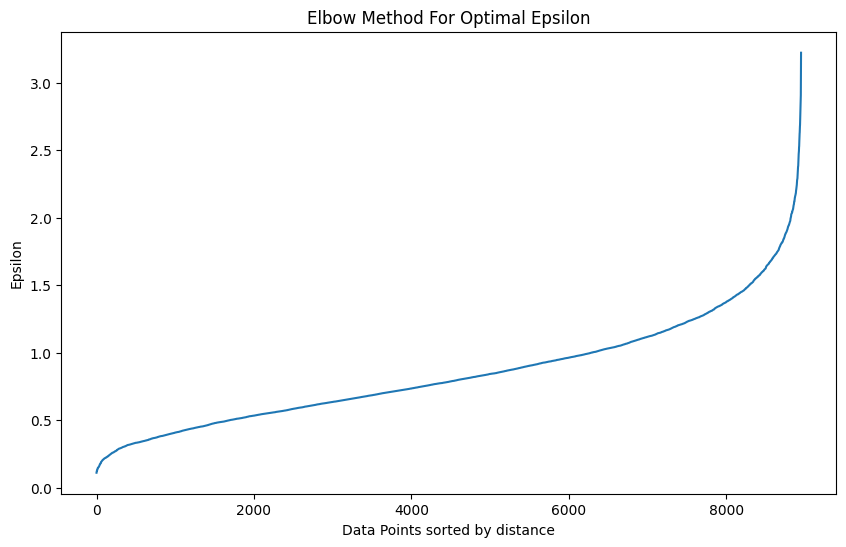

In [18]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(train)
distances, indices = neighbors_fit.kneighbors(train)

distances = np.sort(distances[:, 4], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.title('Elbow Method For Optimal Epsilon')
plt.show()

In [19]:
pca = PCA(n_components=0.95)
train_pca = pca.fit_transform(train)

In [20]:
DBSCAN_model = DBSCAN(eps=1.5, min_samples=5)
DBSCAN_model.fit(train)

DBSCAN(eps=1.5)

In [21]:
labels = DBSCAN_model.labels_
score = silhouette_score(train, labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.1559673582763083


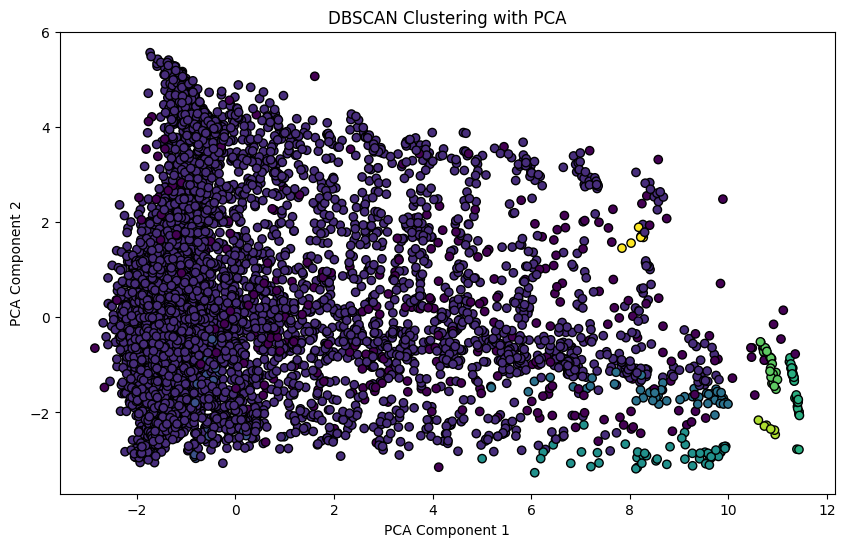

In [22]:
pca = PCA(n_components=0.95)
train_pca = pca.fit_transform(train)

plt.figure(figsize=(10, 6))
plt.scatter(train_pca[:, 0], train_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [23]:
# tsne = TSNE(n_components=2, random_state=42)
# train_tsne = tsne.fit_transform(train)

# plt.figure(figsize=(10, 6))
# plt.scatter(train_tsne[:, 0], train_tsne[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
# plt.title('DBSCAN Clustering with t-SNE')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.show()

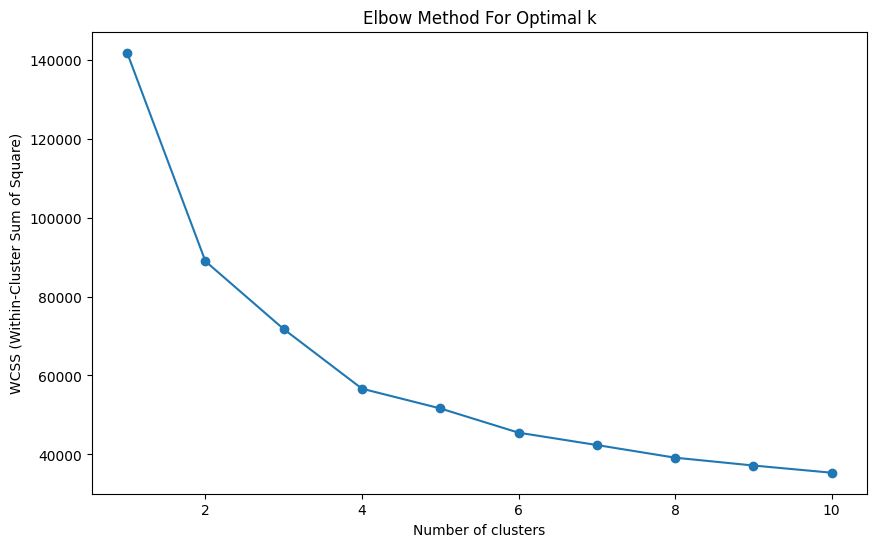

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(train)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(train_pca)

In [26]:
kmeans_silhouette_score = silhouette_score(train_pca, kmeans_labels)
print(f'KMeans Silhouette Score: {kmeans_silhouette_score}')

KMeans Silhouette Score: 0.48465037877141814


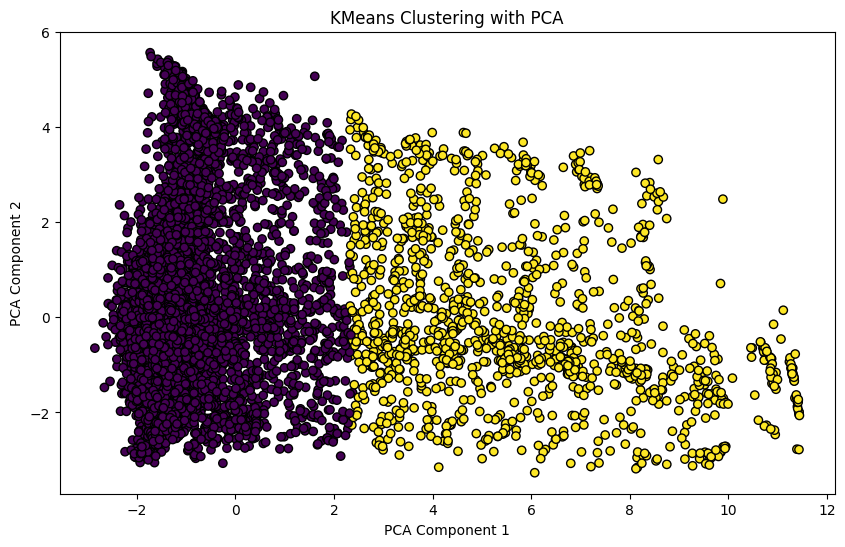

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(train_pca[:, 0], train_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('KMeans Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [28]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clustering.fit_predict(train_pca)

In [29]:
agg_silhouette_score = silhouette_score(train_pca, agg_labels)
print(f'Agglomerative Clustering Silhouette Score: {agg_silhouette_score}')

Agglomerative Clustering Silhouette Score: 0.38358293424527434


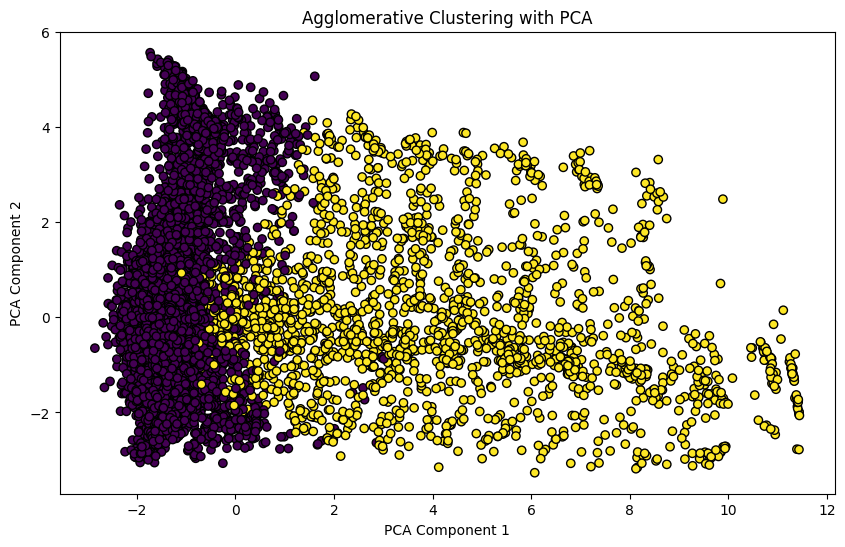

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(train_pca[:, 0], train_pca[:, 1], c=agg_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('Agglomerative Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()